## *US Accidents Exploratory Data Analysis*




In this project, I focused on deriving some insights about the accident trends in the United States between the years 2016 - 2020

First, the dataset is taken from kaggle, it has around 3 million records and 47 features.




In [8]:
pip install opendatasets --upgrade --quiet

In [9]:
import opendatasets as od

download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'

od.download(download_url)

  4%|▍         | 12.0M/290M [00:00<00:02, 124MB/s]

100%|██████████| 290M/290M [00:02<00:00, 105MB/s]


In [13]:
data_filename = './us-accidents/US_Accidents_Dec20_Updated.csv'

In [14]:
import pandas as pd
df = pd.read_csv(data_filename)
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.000,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.000,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.400,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.000,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,NaN,16.0,30.16,10.0,SSW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.000,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,NaN,84.0,29.92,10.0,SSE,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906605,A-2906606,2,2018-06-28 08:49:01,2018-06-28 09:18:51,29.813824,-95.399437,29.813824,-95.399437,0.000,Accident on 30th St at Yale St.,3001.0,Yale St,L,Houston,Harris,TX,77018-8433,US,US/Central,KMCJ,2018-06-28 08:35:00,84.2,NaN,70.0,30.02,9.0,Variable,5.8,NaN,Clear,False,False,False,False,False,False,False,False,False,True,False,False,False,Day,Day,Day,Day
2906606,A-2906607,2,2019-01-10 02:01:01,2019-01-10 02:30:32,34.068890,-117.342010,34.068890,-117.342010,0.000,At Valley Blvd - Accident.,NaN,Cypress Ave,R,Colton,San Bernardino,CA,92324,US,US/Pacific,KSBD,2019-01-10 02:00:00,46.9,NaN,74.0,30.14,10.0,Calm,NaN,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2906607,A-2906608,2,2020-11-23 12:52:00,2020-11-24 00:47:37,25.702200,-80.335556,25.703040,-80.334099,0.108,Stationary traffic on County Hwy-913 - FL-986 ...,8798.0,SW 72nd St,L,Miami,Miami-Dade,FL,33173-3512,US,US/Eastern,KTMB,2020-11-23 12:53:00,76.0,76.0,85.0,30.00,10.0,NNW,16.0,0.0,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2906608,A-2906609,2,2019-12-29 22:38:00,2019-12-29 23:38:00,40.660140,-111.952460,40.660140,-111.952460,0.000,At UT-266/4700/Exit 15 - Accident.,NaN,I-215 N,R,Salt Lake City,Salt Lake,UT,84129,US,US/Mountain,KU42,2019-12-29 22:54:00,27.0,19.0,81.0,25.81,10.0,SSE,8.0,0.0,Cloudy,False,F

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [16]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.906610e+06,2.906610e+06,2.906610e+06,2.623789e+06,2.623789e+06,2.906610e+06,1.014938e+06,2.839386e+06,1.722751e+06,2.835340e+06,2.849702e+06,2.834532e+06,2.599447e+06,1.605284e+06
mean,2.288649e+00,3.653027e+01,-9.642676e+01,3.651733e+01,-9.620367e+01,3.980541e-01,6.789728e+03,6.098873e+01,5.499048e+01,6.537758e+01,2.965685e+01,9.116766e+00,7.818111e+00,1.119459e-02
std,5.541618e-01,5.013964e+00,1.775412e+01,5.016609e+00,1.765971e+01,1.592556e+00,1.697225e+04,1.845258e+01,2.219542e+01,2.287854e+01,9.094133e-01,2.837271e+00,5.431171e+00,1.540812e-01
min,1.000000e+00,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.366453e+01,-1.178232e+02,3.364659e+01,-1.177020e+02,0.000000e+00,9.650000e+02,4.890000e+01,3.900000e+01,4.900000e+01,2.959000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.609977e+01,-9.116690e+01,3.605898e+01,-9.105163e+01,0.000000e+00,3.093000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.992000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.037505e+01,-8.085814e+01,4.033133e+01,-8.084679e+01,2.790000e-01,7.976000e+03,7.500000e+01,7.200000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,2.030000e+02,1.740000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


To figure out how many numeric columns included in the dataset


In [17]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

14

Percentage of missing values per column

In [18]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages

Number                   0.650817
Precipitation(in)        0.447713
Wind_Chill(F)            0.407299
Wind_Speed(mph)          0.105677
End_Lat                  0.097303
End_Lng                  0.097303
Visibility(mi)           0.024798
Weather_Condition        0.024720
Humidity(%)              0.024520
Temperature(F)           0.023128
Wind_Direction           0.021838
Pressure(in)             0.019579
Weather_Timestamp        0.016141
Airport_Code             0.002273
Timezone                 0.001180
Zipcode                  0.000383
Nautical_Twilight        0.000038
Astronomical_Twilight    0.000038
Civil_Twilight           0.000038
Sunrise_Sunset           0.000038
City                     0.000037
Amenity                  0.000000
Severity                 0.000000
Start_Time               0.000000
End_Time                 0.000000
Start_Lat                0.000000
Start_Lng                0.000000
Distance(mi)             0.000000
Description              0.000000
Turning_Loop  

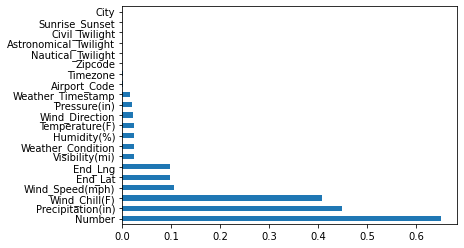

In [19]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

Here I can either drop the most missing columns or keep them with handling the missing values. Street Number, for example, has 60% of missing values so I might drop the column as it may give false analysis of the data. The columns to be dropped are:

In [52]:
df = df.drop(['End_Lat', 'End_Lng', 'Precipitation(in)', 'Wind_Chill(F)', 'Number'], axis=1)

Columns like Astronomical_Twilight, City have null percentage less than 1, so I can just drop rows.

In [53]:
df = df.dropna(subset=['City', 'Astronomical_Twilight', 'Nautical_Twilight', 'Civil_Twilight', 
                                    'Sunrise_Sunset', 'Zipcode', 'Timezone', 'Airport_Code'])

Now there are some columns which have null percentage more than 1, instead of dropping them, I might fill them with proper values.
I can impute values in those.
The columns whose values will be imputed are:-
* Wind_Direction
* Pressure(in)
* Temperature(F)
* Humidity(%)
* Visibility(mi)
* Weather_Condition
* Wind_Speed(mph)

In [58]:
from sklearn_pandas import CategoricalImputer

# For numeric variables, I will be using mean values
df['Pressure(in)'] = df['Pressure(in)'].fillna(df['Pressure(in)'].mean())
df['Temperature(F)'] = df['Temperature(F)'].fillna(df['Temperature(F)'].mean())
df['Humidity(%)'] = df['Humidity(%)'].fillna(df['Humidity(%)'].mean())
df['Visibility(mi)'] = df['Visibility(mi)'].fillna(df['Visibility(mi)'].mean())
df['Wind_Speed(mph)'] = df['Wind_Speed(mph)'].fillna(df['Wind_Speed(mph)'].mean())
# data imputation for categorical variables
x = df[['Wind_Direction', 'Weather_Condition']].values
imputer = CategoricalImputer()
x = imputer.fit_transform(x)
df['Wind_Direction'] = x[:, 0]
df['Weather_Condition'] = x[:, 1]

## Exploratory Analysis and Visualization


# City

In [20]:
df.City

0                Greenville
1                 Charlotte
2                 Los Gatos
3               Carson City
4           Fort Lauderdale
                 ...       
2906605             Houston
2906606              Colton
2906607               Miami
2906608      Salt Lake City
2906609    Colorado Springs
Name: City, Length: 2906610, dtype: object

In [21]:
cities = df.City.unique()
len(cities)

11790

As of 2018, there are 19,495 incorporated cities, towns and villages in the United States. Hence this number is viable. 

In [22]:
cities_by_accident = df.City.value_counts()
cities_by_accident

Los Angeles    68411
Houston        68265
Charlotte      56176
Miami          49965
Dallas         48525
               ...  
Mapleville         1
Appalachia         1
Falkner            1
Canute             1
Emington           1
Name: City, Length: 11789, dtype: int64

In [23]:
cities_by_accident[:20]

Los Angeles      68411
Houston          68265
Charlotte        56176
Miami            49965
Dallas           48525
Austin           38808
Raleigh          31355
Atlanta          29244
Sacramento       28984
Orlando          28092
Nashville        25277
Baton Rouge      25080
Minneapolis      22469
San Diego        22329
Phoenix          21370
Oklahoma City    21292
Portland         19432
Richmond         18343
Seattle          17384
Saint Paul       17266
Name: City, dtype: int64

Top 20 most cities by car accidents

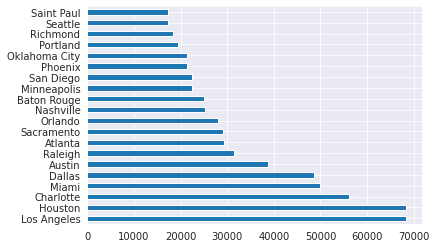

In [26]:
cities_by_accident[:20].plot(kind='barh')

In [25]:
import seaborn as sns
sns.set_style("darkgrid")

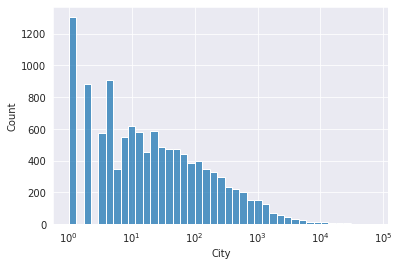

In [27]:
sns.histplot(cities_by_accident, log_scale=True)

Insights:
* The number of accidents per city decreases exponentially
* Less than 5% of cities have more than 1000 yearly accidents.

In [28]:
cities_by_accident[cities_by_accident == 1]

Lodgepole       1
Maroa           1
Gwynedd         1
West Sunbury    1
Hidden Hills    1
               ..
Mapleville      1
Appalachia      1
Falkner         1
Canute          1
Emington        1
Name: City, Length: 1306, dtype: int64

There are 1306 cities with one accident, which indicates that there are some issues with the data (need to investigate), I, for example, might ignore cities that has less than 10 accidents for better analysis

# States

In [74]:
states_by_accident = df.State.value_counts()
states_by_accident

CA    730367
FL    262875
TX    226614
NY    126070
NC    122790
SC    119418
OR     97293
PA     89726
VA     86849
MN     79679
IL     77619
GA     69535
MI     67073
AZ     61676
TN     55493
MD     52519
NJ     50212
LA     50095
WA     49444
OH     47832
UT     46591
CO     37254
OK     35105
AL     33289
MO     28671
MA     25121
IN     24987
CT     24052
KY     15296
WI     14666
NE     13678
IA      9491
RI      8313
NV      7804
KS      7443
NH      6246
MS      5414
DC      5158
AR      4719
DE      4625
ID      4165
NM      3972
WV      3421
MT      3320
ME      2258
VT       555
ND       463
WY       419
SD       217
Name: State, dtype: int64

Top 20 most states by car accidents

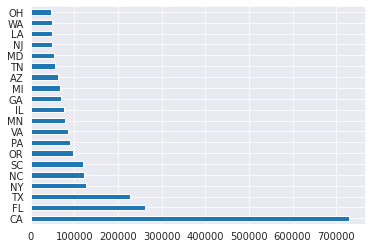

In [75]:
states_by_accident[:20].plot(kind='barh')

I see that CA and TX consists of the majority of the accidents. i want to find out which state has more severity level 4 accidents.


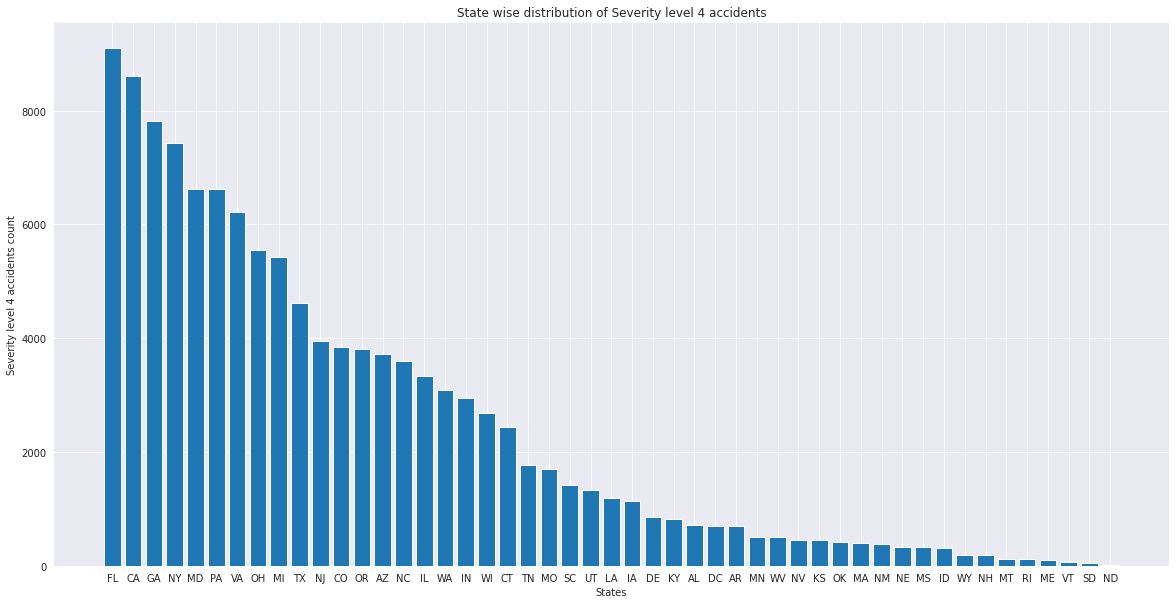

In [82]:
import numpy as np
severe_4 = df[df.Severity == 4].State.value_counts().to_frame().reset_index()
severe_4.columns = ['State', 'Accidents']
severe_4 = severe_4.sort_values(by='Accidents', ascending=False)

objects = list(severe_4.State)
y_pos = np.arange(len(objects))
Numbers = list(severe_4.Accidents)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
plt.bar(y_pos, Numbers, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.xlabel('States')
plt.ylabel('Severity level 4 accidents count')
plt.title('State wise distribution of Severity level 4 accidents')
plt.show()

So FL and TX consists of majority of the accidents of Severity level 4.

# Start Time

In [29]:
df.Start_Time

0          2019-05-21 08:29:55
1          2019-10-07 17:43:09
2          2020-12-13 21:53:00
3          2018-04-17 16:51:23
4          2016-08-31 17:40:49
                  ...         
2906605    2018-06-28 08:49:01
2906606    2019-01-10 02:01:01
2906607    2020-11-23 12:52:00
2906608    2019-12-29 22:38:00
2906609    2018-03-26 13:35:03
Name: Start_Time, Length: 2906610, dtype: object

In [30]:
df.Start_Time = pd.to_datetime(df.Start_Time)

the distribution of accidents by hour

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


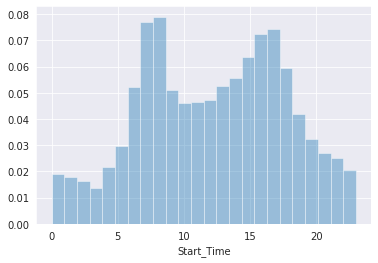

In [31]:
sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)

* A high percentage of accidents occur between 6 am to 10 am (probably people in a hurry to get to work)
* Next highest percentage is 3 pm to 6 pm.

the distribution of accidents by day

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


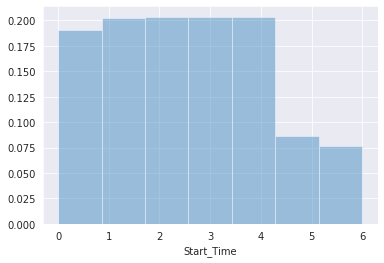

In [32]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)

Is the distribution of accidents by hour the same on weekends as on weekdays?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


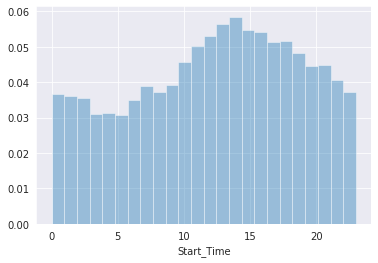

In [33]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


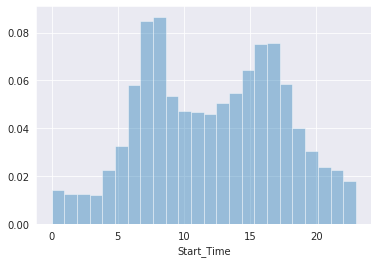

In [34]:
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(monday_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

On Sundays, the peak occurs between 10 am and 3 pm, unlike weekdays

the distribution of accidents by month

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


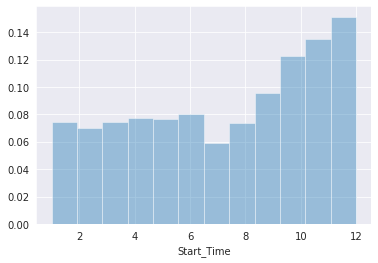

In [66]:
sns.distplot(df.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

All I can see is that most of the accidents happened from October to December. it is not clear why this the case so I will check the weather to see some potential relation. 

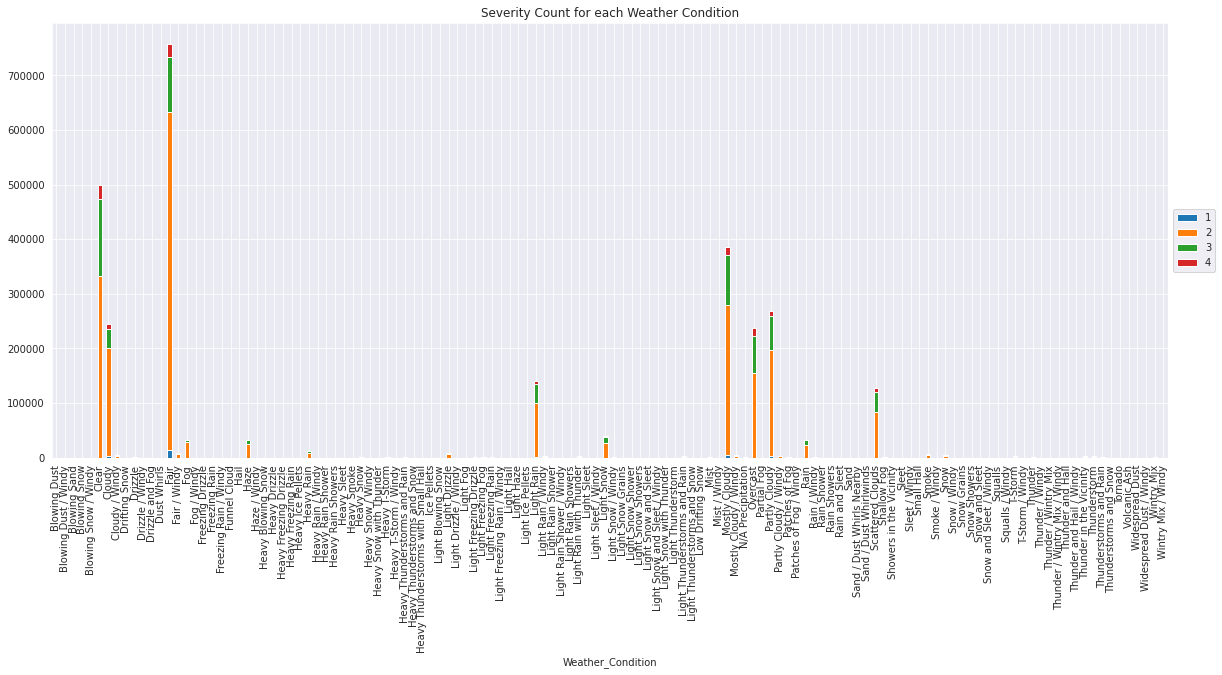

In [68]:
accidents = df.groupby(['Weather_Condition', 'Severity']).size().reset_index().pivot(columns='Severity', 
                                                                      index='Weather_Condition', values=0)

accidents.plot(kind='bar', stacked=True, figsize=(20,8), title='Severity Count for each Weather Condition').legend(loc='center left',
                                                                                        bbox_to_anchor=(1.0, 0.5))

here most of the accidents have happened on clear days. so I will further investigate for specifically severity level 4.

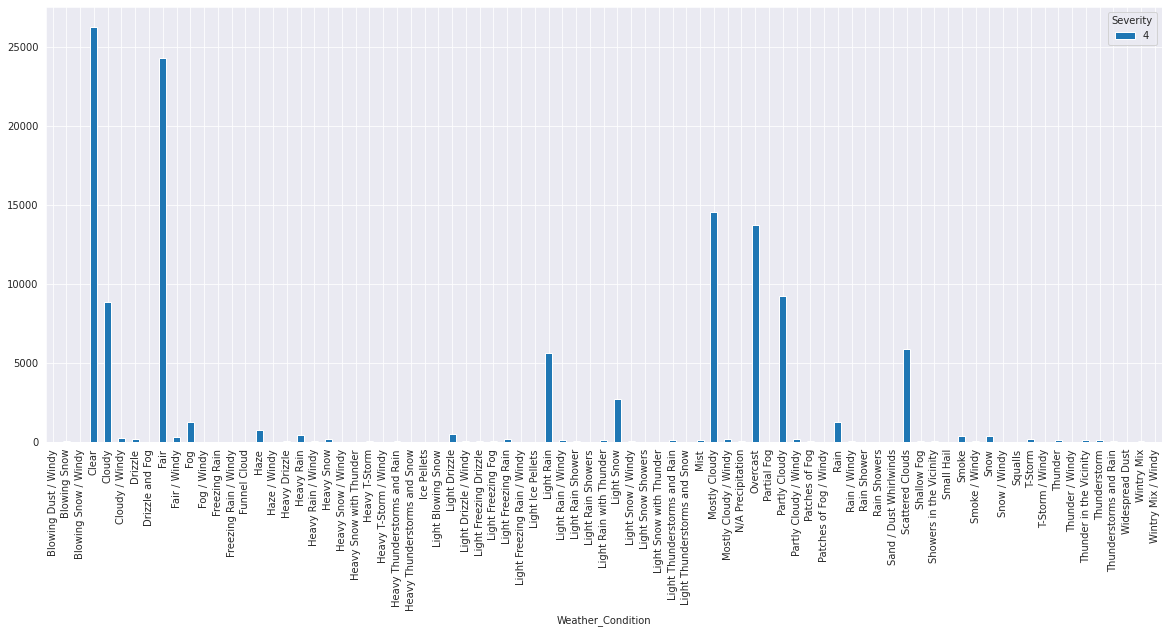

In [71]:
severe_4 = df[df.Severity == 4]
accidents = severe_4.groupby(['Weather_Condition', 'Severity']).size().reset_index().pivot(columns='Severity', 
                                                                      index='Weather_Condition', values=0)
accidents.plot(kind='bar' , figsize=(20,8))


Clearly there is no anomaly in this as most of the accidents happened on clear days. That may mean the accidents don't have any particular reason for happening mostly in the past few months of the year.

## Start Latitude & Longitude

In [39]:
df.Start_Lat

0          34.808868
1          35.090080
2          37.145730
3          39.110390
4          26.102942
             ...    
2906605    29.813824
2906606    34.068890
2906607    25.702200
2906608    40.660140
2906609    38.831749
Name: Start_Lat, Length: 2906610, dtype: float64

In [40]:
df.Start_Lng

0          -82.269157
1          -80.745560
2         -121.985052
3         -119.773781
4          -80.265091
              ...    
2906605    -95.399437
2906606   -117.342010
2906607    -80.335556
2906608   -111.952460
2906609   -104.748161
Name: Start_Lng, Length: 2906610, dtype: float64

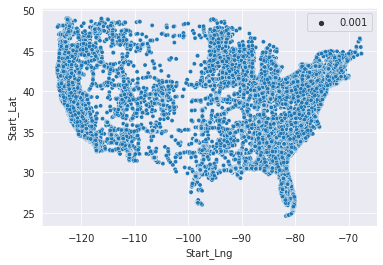

In [41]:
sample_df = df.sample(int(0.1 * len(df)))
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)

I want to look more in details using a heatmap

In [42]:
import folium

In [43]:
lat, lon = df.Start_Lat[0], df.Start_Lng[0]
lat, lon

(34.808868, -82.26915699999998)

In [44]:
for x in df[['Start_Lat', 'Start_Lng']].sample(100).iteritems():
    print(x[1])

1261156    30.434585
54007      41.892600
840871     42.406310
267332     44.964790
1378562    25.927068
             ...    
502962     35.976311
2846063    40.646590
1362716    42.850300
2813410    43.752170
1454488    39.643102
Name: Start_Lat, Length: 100, dtype: float64
1261156    -83.633219
54007      -87.920590
840871     -82.956250
267332     -93.283000
1378562    -80.122205
              ...    
502962     -78.875877
2846063    -74.578820
1362716    -78.790398
2813410   -121.460020
1454488    -75.893436
Name: Start_Lng, Length: 100, dtype: float64


In [45]:
zip(list(df.Start_Lat), list(df.Start_Lng))

In [46]:
from folium.plugins import HeatMap

In [47]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [48]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

# Severity

I will check how much accidents (of each severity level) happened in each year. For severity, The level of impact of the accident. 1 being the lowest and 4 being the highest.


For better analysis, I will break down the start time into year, month, and minute.

In [ ]:
df['year'] = df['Start_Time'].dt.year
df['month'] = df['Start_Time'].dt.month
df['minute'] = df['Start_Time'].dt.minute + (df['Start_Time'].dt.hour * 60.0)

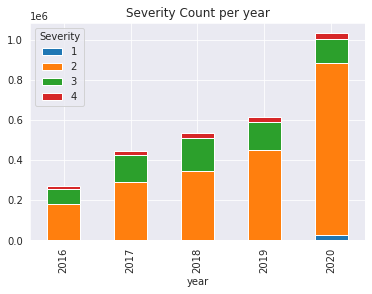

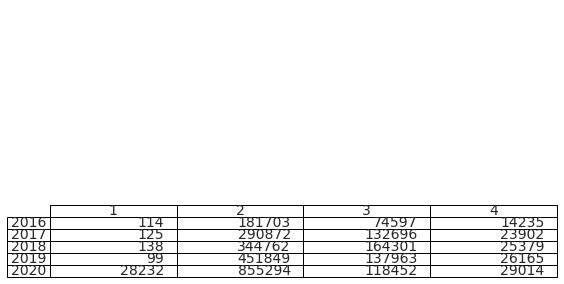

In [64]:
# plot bar graph for accidents per year
import matplotlib.pyplot as plt
from pandas.plotting import table

accidents = df.groupby(['year', 'Severity']).size().reset_index().pivot(columns='Severity', 
                                                                      index='year', values=0)

accidents.plot(kind='bar', stacked=True, title='Severity Count per year')
plt.figure(figsize=(20,8))

# # plot table
ax1 = plt.subplot(222)
plt.axis('off')
tbl = table(ax1, accidents)
tbl.auto_set_font_size(False)
tbl.set_fontsize(14)
plt.show()

Most of the accidents happened in each year are of severity level 2 followed by severity level 3. And the count of other severity level accidents are very low. This class imbalance represents either accidents of severity level 4 and 1 has happened very low or it has not been reported. Moreover, in 2020, severity level 1 and 2 witnessed a dramatic increase in the number of accidents occured.